In [ ]:
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Import libraries for model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
)

# Import libraries for machine learning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Suppress warnings (use with caution)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [ ]:
print('Percentage of Missing Values')
(df.isna().mean() * 100).round(1)

Percentage of Missing Values


,0
Timestamp,0.0
Gender,0.0
Country,0.0
Occupation,0.0
self_employed,1.8
family_history,0.0
treatment,0.0
Days_Indoors,0.0
Growing_Stress,0.0
Changes_Habits,0.0


In [ ]:
df['self_employed'].fillna('Unknown', inplace=True)

In [ ]:
df.isna().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [ ]:
print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

# Print percentage of duplicates
print('Percentage of duplicates: {:.1%}'.format(df.duplicated().mean()))

Amount of duplicates: 2,313
Percentage of duplicates: 0.8%


In [ ]:
df.drop_duplicates(inplace = True)

print('Amount of duplicates: {:,}'.format(df.duplicated().sum()))

Amount of duplicates: 0


In [ ]:
def countsplot(category):
  """
  Creates a count plot and returns a DataFrame with counts and percentages.

  Args:
      category (str): The column name for the categorical variable to plot.

  Returns:
      pandas.DataFrame: A DataFrame containing counts and percentages for each category.
  """

  # Create count plot with dynamic title
  sns.countplot(data = df, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = df[category].value_counts()
  category_percentages = df[category].value_counts(normalize = True)

  # Combine counts and percentages into a DataFrame
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df

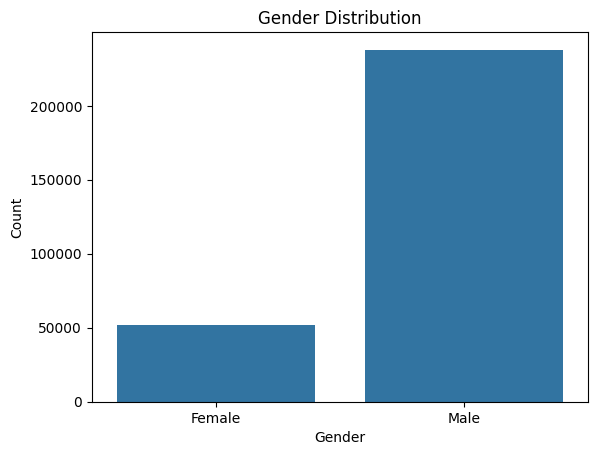

,Count,Proportion
Gender,,
Male,"237,900",82.0%
Female,"52,151",18.0%


In [ ]:
countsplot("Gender")

In [ ]:
def top_10_bar(category, x_rotation = 45):
    """
    Plots a bar plot showing the distribution of a categorical variable for the top 10 categories.

    Args:
        category (str): The column name for the categorical variable to plot.
        x_rotation (int, optional): The number of degrees to rotate the x-axis labels. Defaults to 45.
    """
    # Get the top 10 categories and their counts in a DataFrame
    top_10_df = df[category].value_counts().head(10).reset_index()

    # Plotting
    sns.barplot(data = top_10_df, x = category, y = "count")
    plt.title(category)
    plt.xticks(rotation = x_rotation)
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.show()

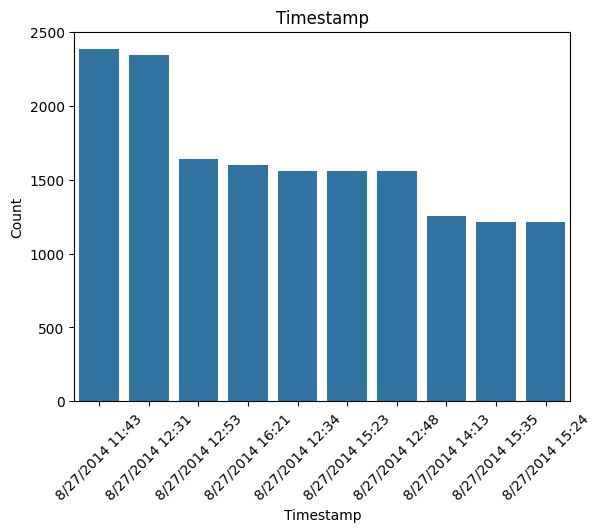

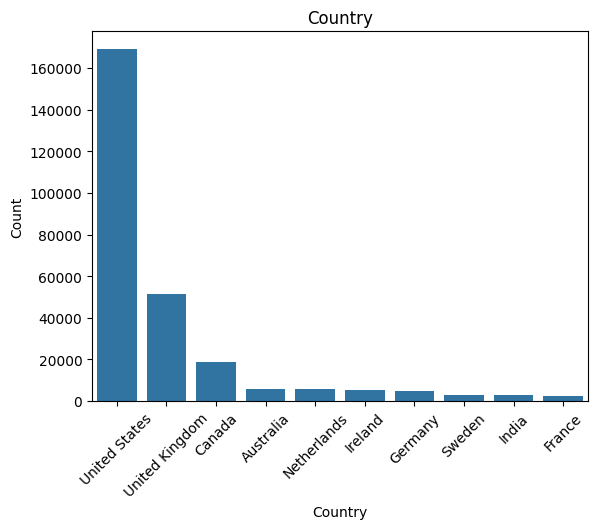

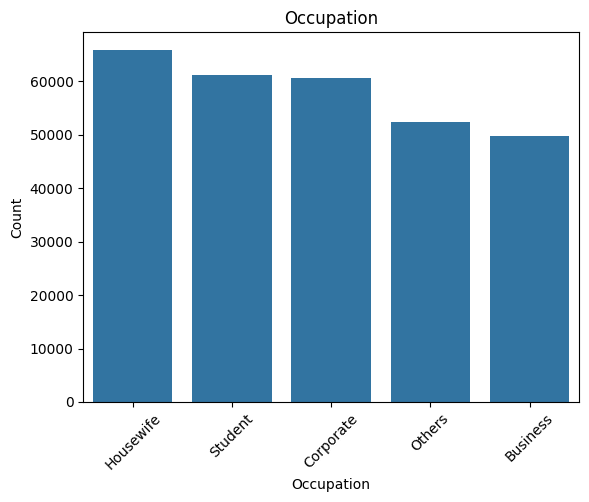

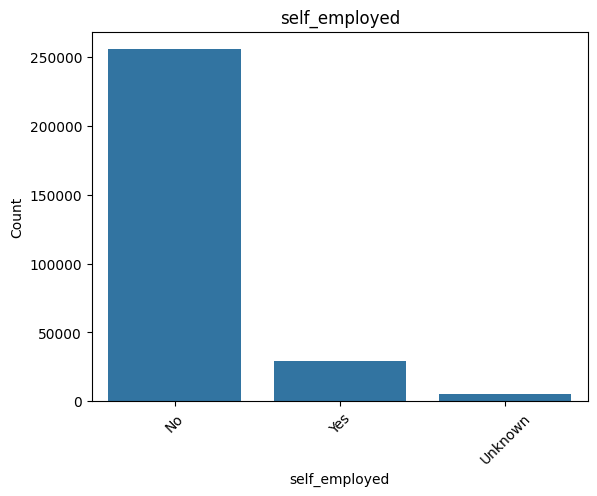

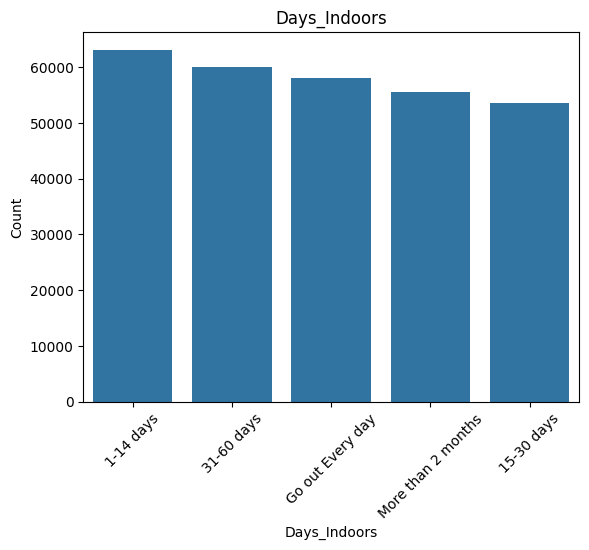

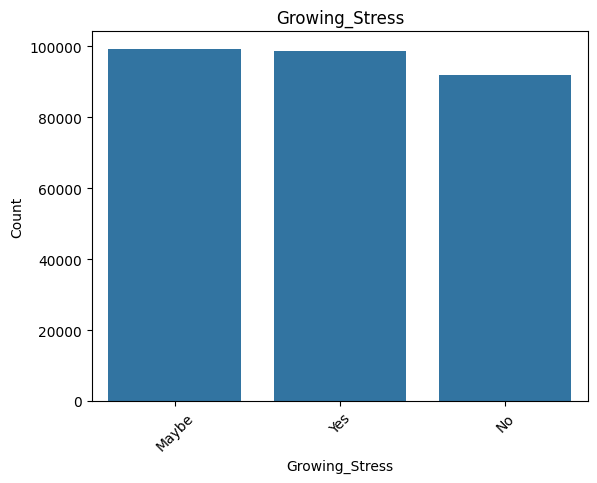

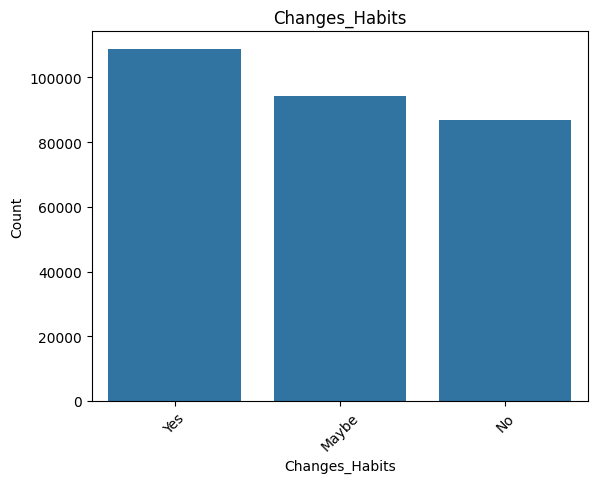

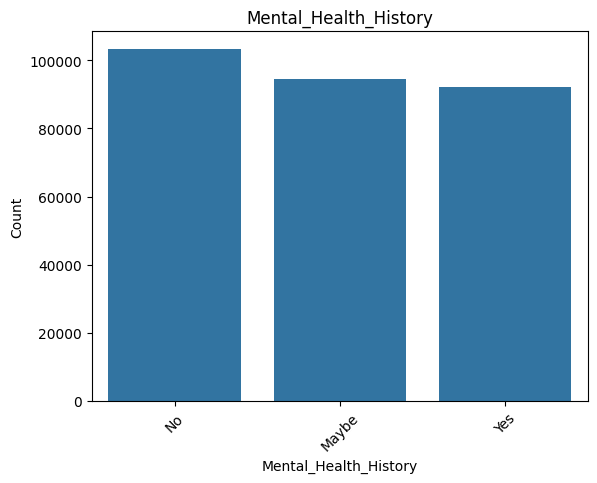

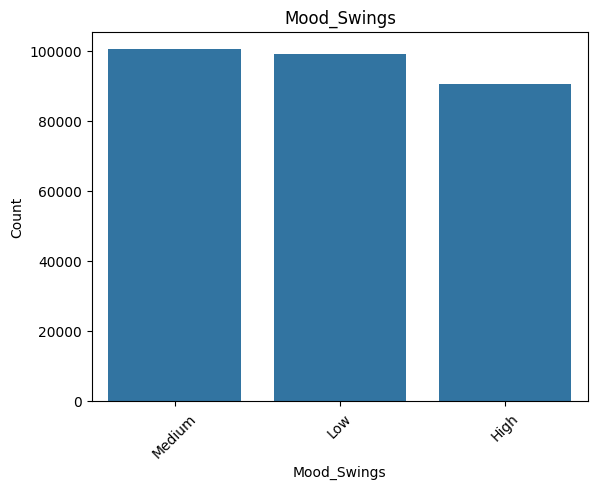

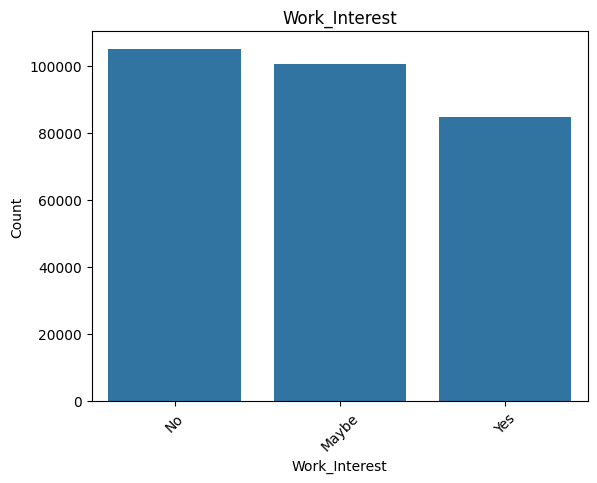

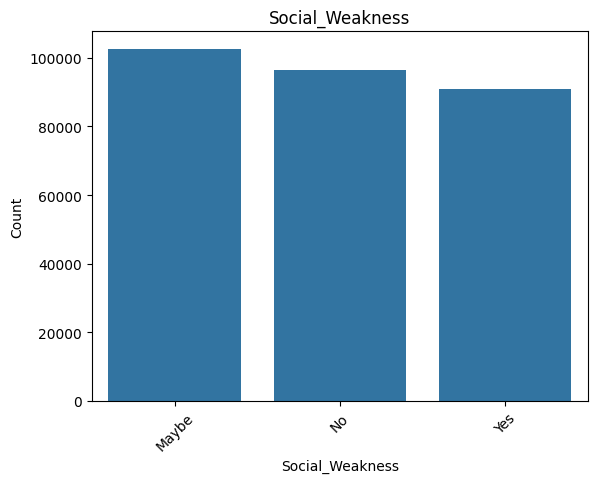

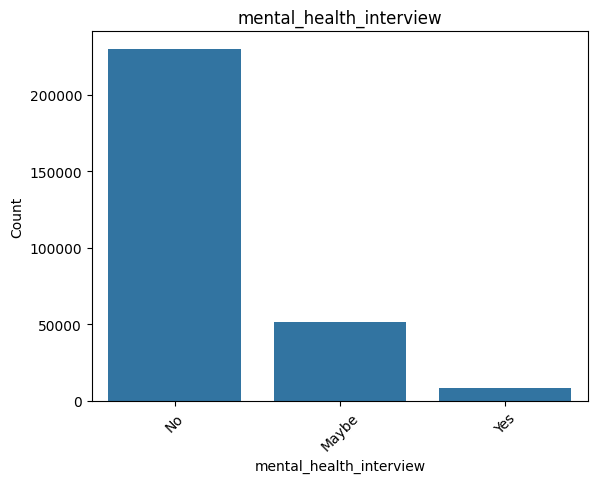

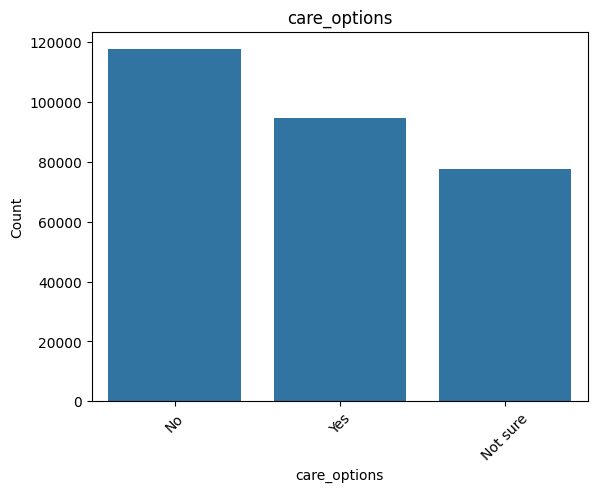

In [ ]:
for column in df.columns:
    if df[column].nunique() > 2:
        top_10_bar(column)

In [ ]:
le = LabelEncoder()

# Apply LabelEncoder to each column
encoded_df = df.apply(le.fit_transform)

#encoded_df.head()

In [ ]:
X = encoded_df.drop("Mood_Swings", axis = 1)

y = encoded_df["Mood_Swings"]
#y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
def pipeline_classification(pipelines):
  """
  Performs classification using cross-validation, evaluates different models,
  and makes predictions for each model on the test set.

  Args:
      pipelines (list): List of tuples containing model names and pipeline objects.

  Returns:
      pandas.DataFrame: A DataFrame containing model names, mean accuracy, standard deviation,
                        and a dictionary with test set predictions for each model.
  """

  # Initialize lists to store results
  cv_results = []
  model_names = []
  model_predictions = {}
  model_probabilities = {}

  # Perform cross-validation and store results
  for name, pipe in pipelines:
      # Fit the pipeline to the training data
      pipe.fit(X_train, y_train)

      kfold = KFold(n_splits = 10, shuffle = True)
      cv_results.append(cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = 'accuracy', n_jobs = -1))
      model_names.append(name)

      # Make predictions on the test set and store them
      model_predictions[name] = pipe.predict(X_test)

      # Calculate probabilities on the test set and store them
      model_probabilities[name] = pipe.predict_proba(X_test)

  # Plot the results
  plt.boxplot(cv_results)
  plt.xticks(range(1, len(model_names) + 1), model_names)
  plt.title('Algorithm Comparison')
  plt.xlabel('Model')
  plt.ylabel('Accuracy')
  plt.show()

  # Convert results to a DataFrame
  results_df = pd.DataFrame({
      'Model': model_names,
      'Mean Accuracy': [scores.mean() for scores in cv_results],
      'Standard Deviation': [scores.std() for scores in cv_results]
  })

  return results_df, model_predictions, model_probabilities

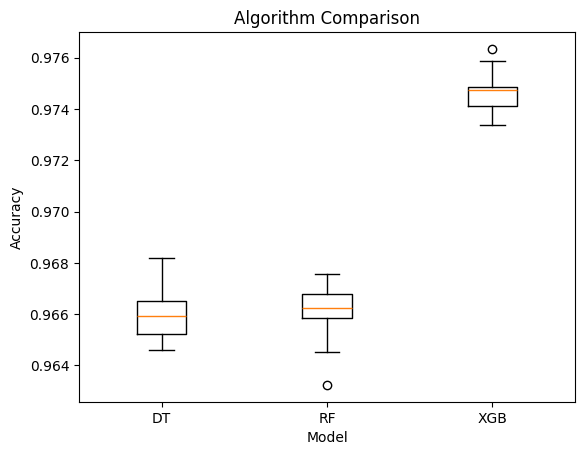

,Model,Mean Accuracy,Standard Deviation
0,DT,0.966002,0.001053
1,RF,0.966006,0.001196
2,XGB,0.974672,0.000890


In [ ]:
pipelines = [
    ('DT', Pipeline([('scaler', MinMaxScaler()), ('DT', DecisionTreeClassifier())])),
    ('RF', Pipeline([('scaler', MinMaxScaler()), ('RF', RandomForestClassifier())])),
    ('XGB', Pipeline([('XGB', XGBClassifier())])),
  ]

results_df, model_predictions, model_probabilities = pipeline_classification(pipelines)
results_df

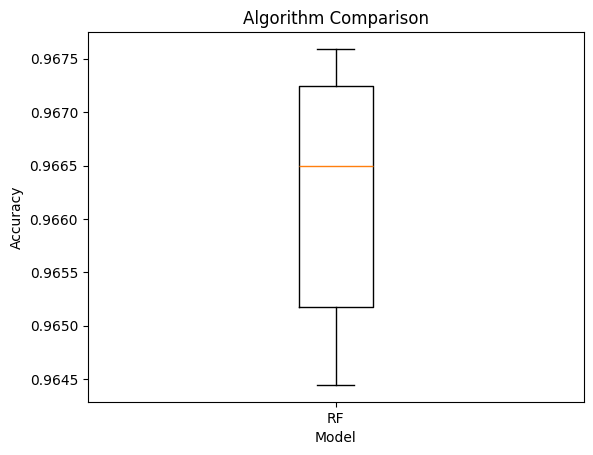

,Model,Mean Accuracy,Standard Deviation
0,RF,0.96623,0.001144


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()

# Apply LabelEncoder to each column
encoded_df = df.apply(le.fit_transform)

# Split data into X (features) and y (target)
X = encoded_df.drop("Mood_Swings", axis=1)
y = encoded_df["Mood_Swings"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline for Random Forest only
def pipeline_classification(pipelines):
    """
    Performs classification using cross-validation, evaluates different models,
    and makes predictions for each model on the test set.

    Args:
        pipelines (list): List of tuples containing model names and pipeline objects.

    Returns:
        pandas.DataFrame: A DataFrame containing model names, mean accuracy, standard deviation,
                          and a dictionary with test set predictions for each model.
    """

    # Initialize lists to store results
    cv_results = []
    model_names = []
    model_predictions = {}
    model_probabilities = {}

    # Perform cross-validation and store results
    for name, pipe in pipelines:
        # Fit the pipeline to the training data
        pipe.fit(X_train, y_train)

        kfold = KFold(n_splits=10, shuffle=True)
        cv_results.append(cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1))
        model_names.append(name)

        # Make predictions on the test set and store them
        model_predictions[name] = pipe.predict(X_test)

        # Calculate probabilities on the test set and store them
        model_probabilities[name] = pipe.predict_proba(X_test)

    # Plot the results
    plt.boxplot(cv_results)
    plt.xticks(range(1, len(model_names) + 1), model_names)
    plt.title('Algorithm Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.show()

    # Convert results to a DataFrame
    results_df = pd.DataFrame({
        'Model': model_names,
        'Mean Accuracy': [scores.mean() for scores in cv_results],
        'Standard Deviation': [scores.std() for scores in cv_results]
    })

    return results_df, model_predictions, model_probabilities

# Define pipeline with only RandomForest
pipelines = [
    ('RF', Pipeline([('scaler', MinMaxScaler()), ('RF', RandomForestClassifier())])),
]

# Call the function with only the Random Forest pipeline
results_df, model_predictions, model_probabilities = pipeline_classification(pipelines)

# Show the results
results_df
